In [1]:
#Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
#Add the latitudes and longitudes to a list. 
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

616

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [41]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):
 
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()           

        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                              "Lat": city_lat,
                              "Lng": city_lng,
                              "Max Temp": city_max_temp,
                                  "Humidity": city_humidity,
                                  "Cloudiness": city_clouds,
                                  "Wind Speed": city_wind,
                                  "Country": city_country,
                                  "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | oshikango
Processing Record 3 of Set 1 | butaritari
Processing Record 4 of Set 1 | lieksa
Processing Record 5 of Set 1 | kodiak
Processing Record 6 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 7 of Set 1 | korla
Processing Record 8 of Set 1 | vaini
Processing Record 9 of Set 1 | say
Processing Record 10 of Set 1 | castro
Processing Record 11 of Set 1 | san andres
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | east london
Processing Record 14 of Set 1 | port alfred
Processing Record 15 of Set 1 | nikolskoye
Processing Record 16 of Set 1 | mataura
Processing Record 17 of Set 1 | qaanaaq
Processing Record 18 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 19 of Set 1 | parlakimidi
Processing Record 20 of Set 1 | atuona
Processing Record 21 of Set 1 | the valley
Processing Reco

In [10]:
len(city_data)

567

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,73.24,74,100,17.74,PF,2021-09-30 05:01:57
1,Oshikango,-17.4000,15.8833,62.55,26,0,7.31,NA,2021-09-30 05:01:58
2,Butaritari,3.0707,172.7902,82.87,73,66,15.12,KI,2021-09-30 05:01:59
3,Lieksa,63.3167,30.0167,47.61,67,100,5.77,FI,2021-09-30 05:02:00
4,Kodiak,57.7900,-152.4072,41.67,69,5,3.83,US,2021-09-30 05:02:01
5,Korla,41.7597,86.1469,76.57,14,3,6.80,CN,2021-09-30 05:02:02
6,Vaini,-21.2000,-175.2000,74.41,72,100,21.77,TO,2021-09-30 05:02:04
7,Say,13.1007,2.3689,78.24,77,90,4.85,NE,2021-09-30 05:02:05
8,Castro,-24.7911,-50.0119,59.38,96,80,9.42,BR,2021-09-30 04:59:53
9,San Andres,12.5847,-81.7006,82.56,78,100,10.31,CO,2021-09-30 05:00:16


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [13]:
city_data_df = city_data_df[new_column_order]

In [14]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2021-09-30 05:01:57,-23.1203,-134.9692,73.24,74,100,17.74
1,Oshikango,NA,2021-09-30 05:01:58,-17.4000,15.8833,62.55,26,0,7.31
2,Butaritari,KI,2021-09-30 05:01:59,3.0707,172.7902,82.87,73,66,15.12
3,Lieksa,FI,2021-09-30 05:02:00,63.3167,30.0167,47.61,67,100,5.77
4,Kodiak,US,2021-09-30 05:02:01,57.7900,-152.4072,41.67,69,5,3.83
...,...,...,...,...,...,...,...,...,...
562,Ngara,TZ,2021-09-30 05:07:40,-2.5122,30.6558,62.46,71,93,0.76
563,Lumphat,KH,2021-09-30 05:07:40,13.4878,106.9816,88.41,63,28,3.56
564,Vierzon,FR,2021-09-30 05:07:41,47.2101,2.0625,43.39,76,7,3.71
565,Guacui,BR,2021-09-30 05:07:41,-20.7756,-41.6794,67.10,92,83,3.04


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

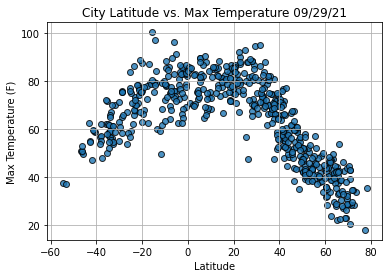

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

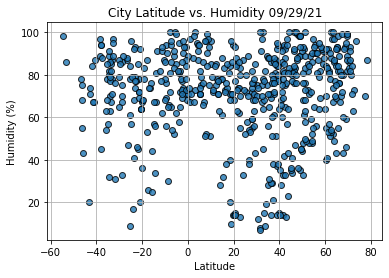

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

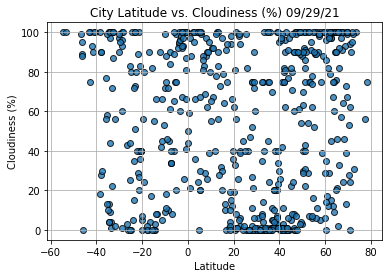

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

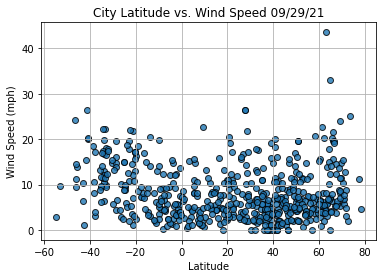

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [22]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [23]:
index13 = city_data_df.loc[13]
index13

City                   Nikolskoye
Country                        RU
Date          2021-09-30 05:02:11
Lat                       59.7035
Lng                       30.7861
Max Temp                    43.39
Humidity                       91
Cloudiness                      6
Wind Speed                   3.62
Name: 13, dtype: object

In [24]:
city_data_df["Lat"] >= 0

0      False
1      False
2       True
3       True
4       True
       ...  
562    False
563     True
564     True
565    False
566     True
Name: Lat, Length: 567, dtype: bool

In [25]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Butaritari,KI,2021-09-30 05:01:59,3.0707,172.7902,82.87,73,66,15.12
3,Lieksa,FI,2021-09-30 05:02:00,63.3167,30.0167,47.61,67,100,5.77
4,Kodiak,US,2021-09-30 05:02:01,57.7900,-152.4072,41.67,69,5,3.83
5,Korla,CN,2021-09-30 05:02:02,41.7597,86.1469,76.57,14,3,6.80
7,Say,NE,2021-09-30 05:02:05,13.1007,2.3689,78.24,77,90,4.85
...,...,...,...,...,...,...,...,...,...
560,Ramhormoz,IR,2021-09-30 05:07:17,31.2800,49.6035,95.13,7,0,2.21
561,Xiongzhou,CN,2021-09-30 05:07:40,25.1167,114.3000,92.95,52,40,2.93
563,Lumphat,KH,2021-09-30 05:07:40,13.4878,106.9816,88.41,63,28,3.56
564,Vierzon,FR,2021-09-30 05:07:41,47.2101,2.0625,43.39,76,7,3.71


In [26]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Butaritari,KI,2021-09-30 05:01:59,3.0707,172.7902,82.87,73,66,15.12
3,Lieksa,FI,2021-09-30 05:02:00,63.3167,30.0167,47.61,67,100,5.77
4,Kodiak,US,2021-09-30 05:02:01,57.7900,-152.4072,41.67,69,5,3.83
5,Korla,CN,2021-09-30 05:02:02,41.7597,86.1469,76.57,14,3,6.80
7,Say,NE,2021-09-30 05:02:05,13.1007,2.3689,78.24,77,90,4.85


In [27]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]


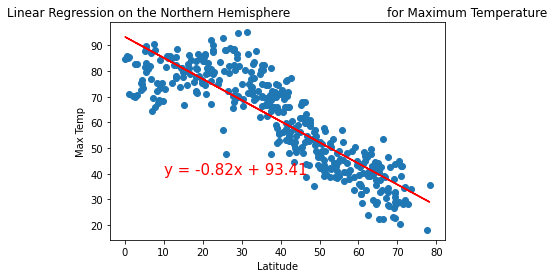

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))


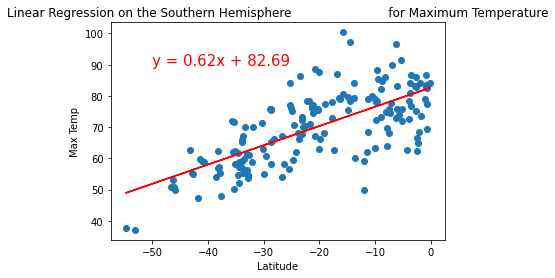

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

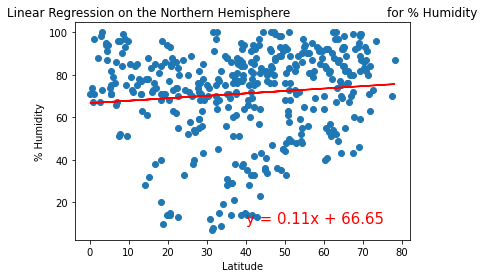

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

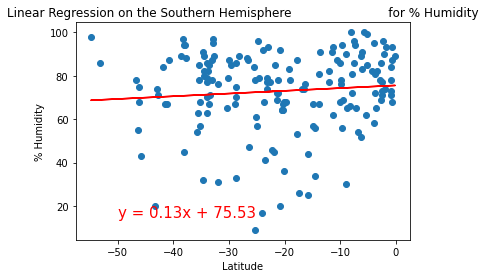

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

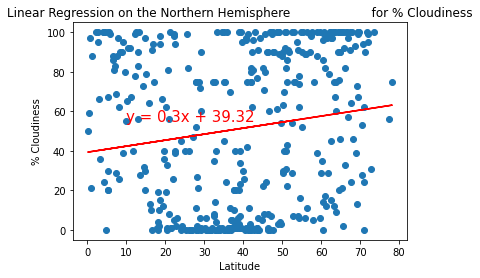

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values,
                   'Linear Regression on the Northern Hemisphere \
                    for % Cloudiness', '% Cloudiness',(10,55))

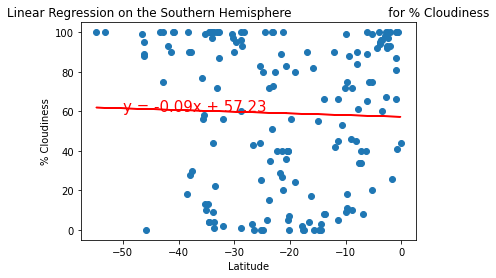

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

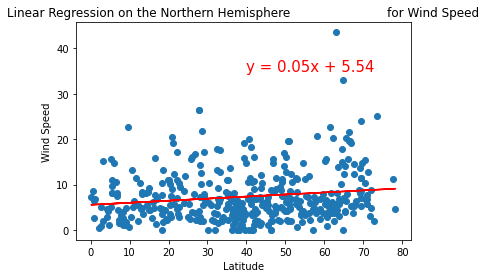

In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

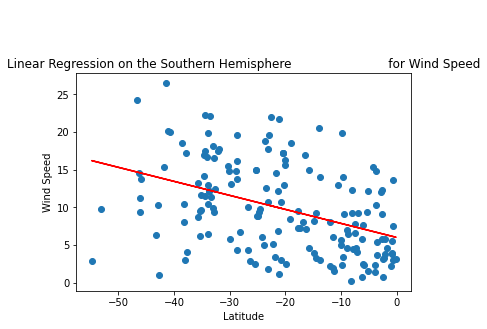

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))